In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree , export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
columns = ['target','F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 
           'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22']

# Wczytanie danych z pliku
test_data = pd.read_csv("SPECT.test",header=None,names=columns)
train_data = pd.read_csv("SPECT.train",header=None,names=columns)


In [2]:
train_data.head()

target  F1  F2  F3  F4  F5  F6  F7  F8  F9  ...  F13  F14  F15  F16  F17  \
0       1   0   0   0   1   0   0   0   1   1  ...    1    1    0    0    0   
1       1   0   0   1   1   0   0   0   1   1  ...    1    1    0    0    0   
2       1   1   0   1   0   1   0   0   1   0  ...    1    0    0    0    0   
3       1   0   0   0   0   0   0   0   0   0  ...    0    0    0    0    0   
4       1   0   0   0   0   0   0   0   1   0  ...    1    0    1    1    0   

   F18  F19  F20  F21  F22  
0    0    0    0    0    0  
1    0    0    0    0    1  
2    0    0    0    0    0  
3    0    0    1    1    1  
4    0    0    0    0    0  

[5 rows x 23 columns]

In [3]:
print(train_data.describe())

          target         F1         F2         F3         F4         F5  \
count  80.000000  80.000000  80.000000  80.000000  80.000000  80.000000   
mean    0.500000   0.362500   0.162500   0.262500   0.212500   0.300000   
std     0.503155   0.483755   0.371236   0.442769   0.411658   0.461149   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.500000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     1.000000   1.000000   0.000000   1.000000   0.000000   1.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

              F6         F7         F8         F9  ...        F13        F14  \
count  80.000000  80.000000  80.000000  80.000000  ...  80.000000  80.000000   
mean    0.125000   0.262500   0.275000   0.187500  ...   0.350000   0.200000   
std     0.332805   0.442769   0.449331   0.392775  ...   0.479979   0.402524   
min 

In [4]:
test_data.head() 

target  F1  F2  F3  F4  F5  F6  F7  F8  F9  ...  F13  F14  F15  F16  F17  \
0       1   1   0   0   1   1   0   0   0   1  ...    0    1    1    1    0   
1       1   1   0   0   1   1   0   0   0   0  ...    1    0    0    0    0   
2       1   0   0   0   1   0   1   0   0   1  ...    0    1    1    0    0   
3       1   0   1   1   1   0   0   1   0   1  ...    1    1    0    1    0   
4       1   0   0   1   0   0   0   0   1   0  ...    1    1    0    1    0   

   F18  F19  F20  F21  F22  
0    0    1    1    0    0  
1    0    0    0    0    0  
2    0    0    0    0    1  
3    0    0    0    1    0  
4    0    0    0    0    1  

[5 rows x 23 columns]

In [5]:
print(test_data.describe())

           target          F1          F2          F3          F4          F5  \
count  187.000000  187.000000  187.000000  187.000000  187.000000  187.000000   
mean     0.919786    0.481283    0.283422    0.449198    0.315508    0.449198   
std      0.272353    0.500991    0.451870    0.498748    0.465965    0.498748   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               F6          F7          F8          F9  ...         F13  \
count  187.000000  187.000000  187.000000  187.000000  ...  187.000000   
mean     0.283422    0.294118    0.491979    0.363636  ...    0.556150   
std      0.451870    0.456868    0.501278    0.4

In [6]:
label_column = 'target'

# Wyświetlenie procentowej ilości osób z chorobami serca w zbiorze testowym
percent_with_heart_disease_test = test_data[label_column].value_counts(normalize=True) * 100
print("Procentowa ilość osób z chorobami serca w zbiorze testowym:")
print(percent_with_heart_disease_test)

# Wyświetlenie procentowej ilości osób z chorobami serca w zbiorze treningowym
percent_with_heart_disease_train = train_data[label_column].value_counts(normalize=True) * 100
print("\nProcentowa ilość osób z chorobami serca w zbiorze treningowym:")
print(percent_with_heart_disease_train)

Procentowa ilość osób z chorobami serca w zbiorze testowym:
target
1    91.97861
0     8.02139
Name: proportion, dtype: float64

Procentowa ilość osób z chorobami serca w zbiorze treningowym:
target
1    50.0
0    50.0
Name: proportion, dtype: float64


In [7]:
#przygotowanie danych do uczenia i analizy modelu

X_train = train_data.drop("target", axis=1)
y_train = train_data["target"]

X_test = test_data.drop("target", axis=1)
y_test = test_data["target"]


In [8]:
# Uczenie modelu
model = DecisionTreeClassifier(random_state=17)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=17)

In [9]:
# Przewidywanie na danych treningowych
y_train_pred = model.predict(X_train)

# Przewidywanie na danych testowych
y_test_pred = model.predict(X_test)

# Przewidywanie na danych testowych
accuracy_test = accuracy_score(y_test, y_test_pred)

# Przewidywanie na danych treningowych
accuracy_train = accuracy_score(y_train, y_train_pred)

# Dokładność na danych testowych
print(f'Dokładność na danych treningowych: {accuracy_train}')
print(f'Dokładność na danych testowych: {accuracy_test}')


Dokładność na danych treningowych: 0.9375
Dokładność na danych testowych: 0.679144385026738


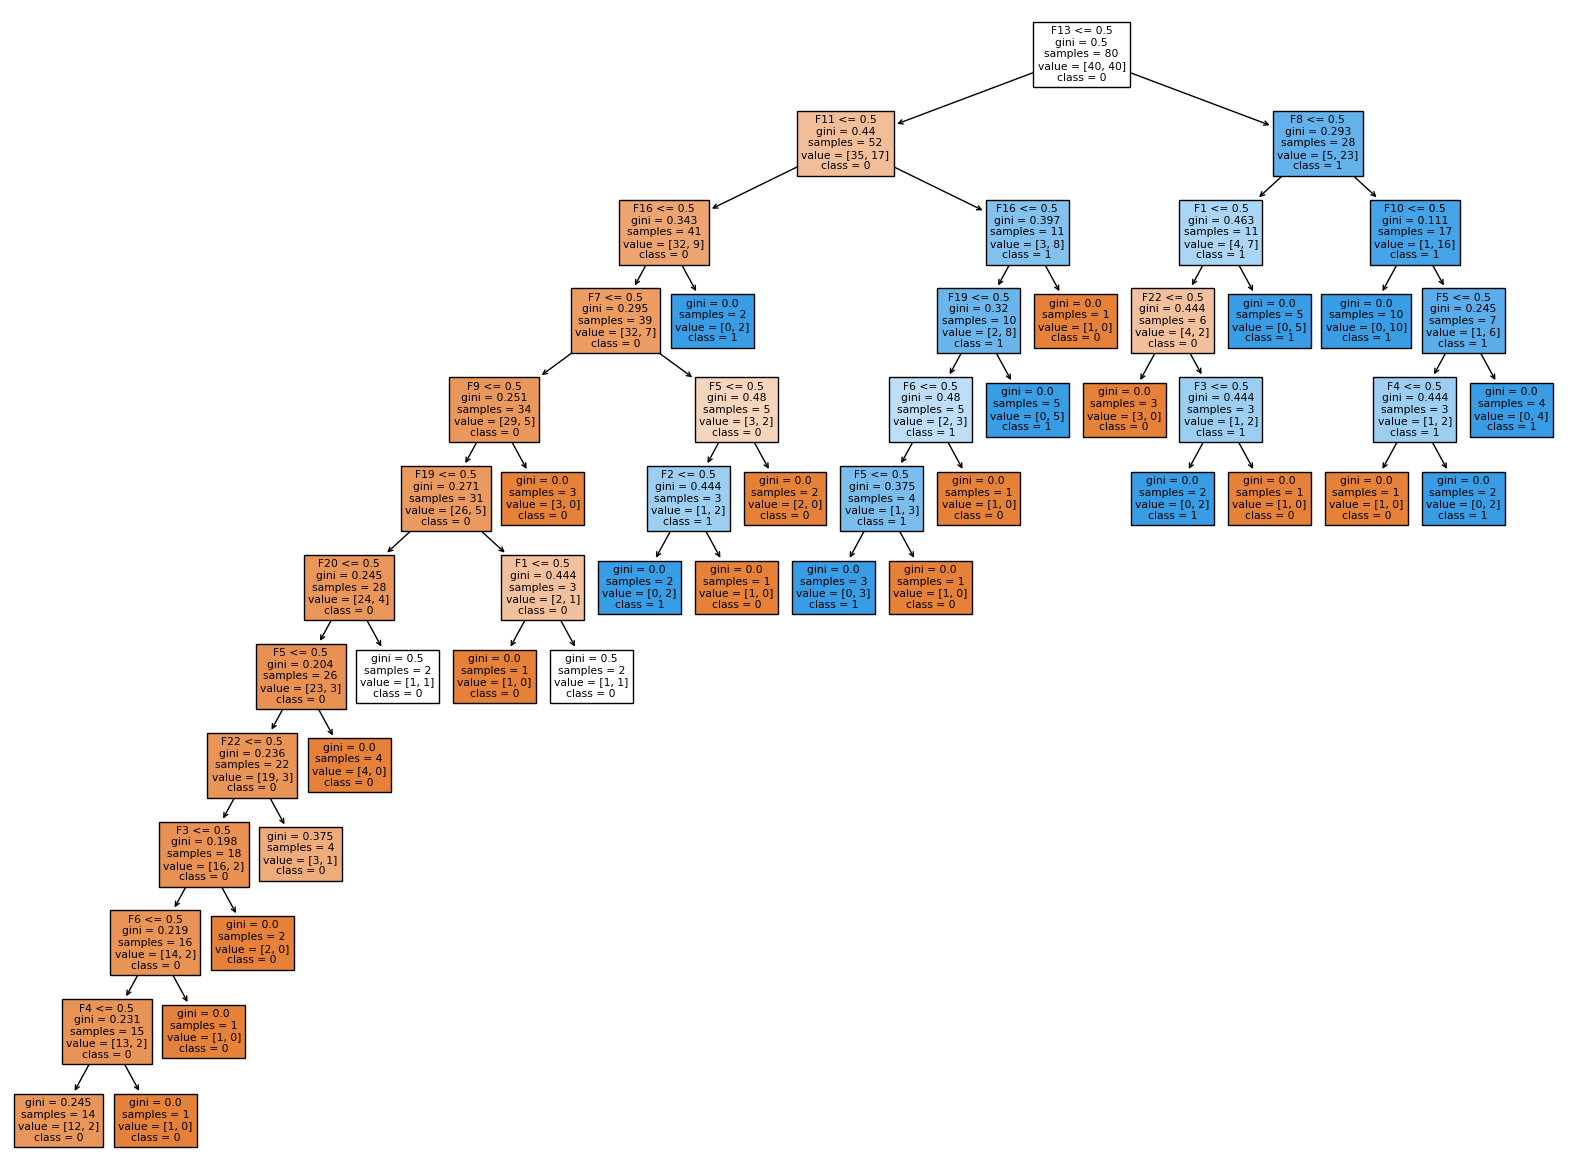

In [10]:
plt.figure(figsize=(20, 15))
plot_tree(model, filled=True, feature_names=list(X_train.columns), class_names=list([str(c) for c in model.classes_]))
plt.show()

In [11]:
# Wizualizacja ważności cech:
feature_importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

F13: 0.26914769895331453
F11: 0.13522846536595678
F16: 0.11264216652195372
F5: 0.09293499876653229
F1: 0.08338242031546568
F22: 0.04413465104609813
F3: 0.041996640268778494
F4: 0.04146868250539956
F2: 0.04031677465802736
F8: 0.03752555410540421
F19: 0.030135395619963236
F6: 0.02822174226061913
F7: 0.016865546683867163
F20: 0.01661405549094536
F10: 0.0050819463854656355
F9: 0.0043032610522087565
F12: 0.0
F14: 0.0
F15: 0.0
F17: 0.0
F18: 0.0
F21: 0.0


In [12]:

depths = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16 ]
criterions = ['gini', 'entropy']

for criterion in criterions:

    for depth in depths:
        model = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=17)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy'))
        
        # Wyświetlenie wyników kroswalidacji
        print(f"Kryterium: {criterion}, Głębokość: {depth}")
        print(f"Średnia dokładność: {accuracy:.4f}")
        print("Macierz Konfuzji:")
        print(confusion_matrix(y_test, y_pred))
        print("\n")
        

Kryterium: gini, Głębokość: 1
Średnia dokładność: 0.6875
Macierz Konfuzji:
[[ 13   2]
 [ 70 102]]


Kryterium: gini, Głębokość: 2
Średnia dokładność: 0.7375
Macierz Konfuzji:
[[ 12   3]
 [ 51 121]]


Kryterium: gini, Głębokość: 3
Średnia dokładność: 0.7250
Macierz Konfuzji:
[[ 12   3]
 [ 53 119]]


Kryterium: gini, Głębokość: 4
Średnia dokładność: 0.7375
Macierz Konfuzji:
[[ 11   4]
 [ 43 129]]


Kryterium: gini, Głębokość: 5
Średnia dokładność: 0.7125
Macierz Konfuzji:
[[ 12   3]
 [ 53 119]]


Kryterium: gini, Głębokość: 6
Średnia dokładność: 0.6875
Macierz Konfuzji:
[[ 12   3]
 [ 54 118]]


Kryterium: gini, Głębokość: 7
Średnia dokładność: 0.6500
Macierz Konfuzji:
[[ 12   3]
 [ 54 118]]


Kryterium: gini, Głębokość: 8
Średnia dokładność: 0.6625
Macierz Konfuzji:
[[ 12   3]
 [ 57 115]]


Kryterium: gini, Głębokość: 9
Średnia dokładność: 0.6750
Macierz Konfuzji:
[[ 12   3]
 [ 54 118]]


Kryterium: gini, Głębokość: 10
Średnia dokładność: 0.6375
Macierz Konfuzji:
[[ 12   3]
 [ 56 116]]



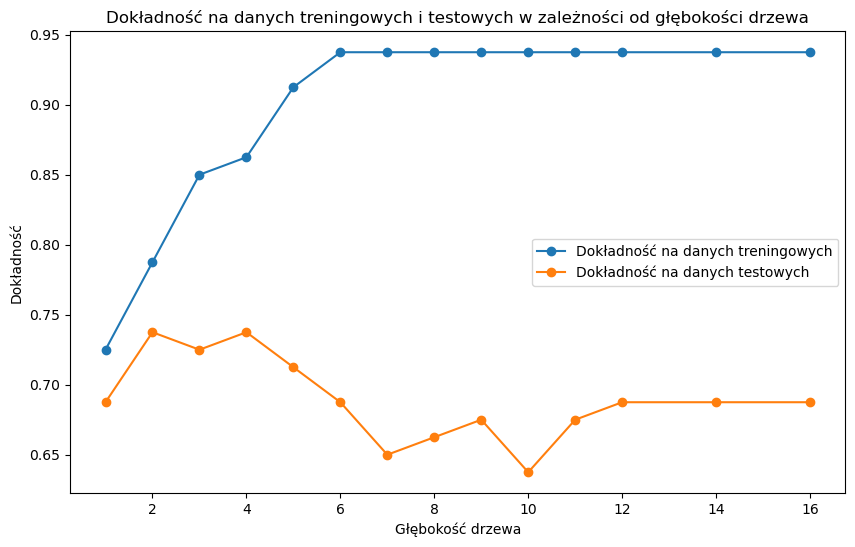

In [13]:
import matplotlib.pyplot as plt

depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16]
criterions = ['gini']

train_accuracies = []
test_accuracies = []

for criterion in criterions:
    for depth in depths:
        model = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=17)
        model.fit(X_train, y_train)
        
        # Dokładność na danych treningowych
        train_pred = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_pred)
        train_accuracies.append(train_accuracy)
        
        # Dokładność na danych testowych
        
        test_pred = model.predict(X_test)
        test_accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy'))
        test_accuracies.append(test_accuracy)
# Stworzenie wykresu
plt.figure(figsize=(10, 6))
plt.plot(depths * len(criterions), train_accuracies, label='Dokładność na danych treningowych', marker='o')
plt.plot(depths * len(criterions), test_accuracies, label='Dokładność na danych testowych', marker='o')
plt.xlabel('Głębokość drzewa')
plt.ylabel('Dokładność')
plt.title('Dokładność na danych treningowych i testowych w zależności od głębokości drzewa')
plt.legend()

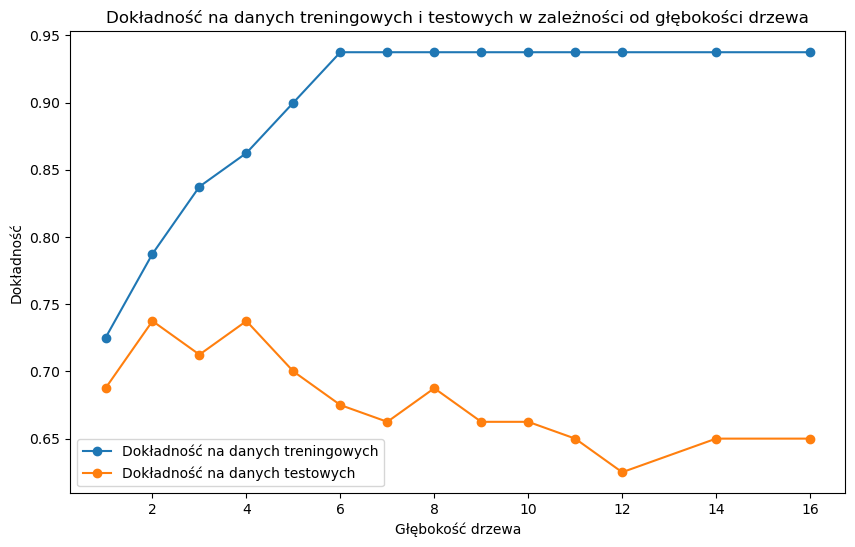

In [14]:

depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16]
criterions = ['entropy']

train_accuracies = []
test_accuracies = []

for criterion in criterions:
    for depth in depths:
        model = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=17)
        model.fit(X_train, y_train)
        
        # Dokładność na danych treningowych
        train_pred = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_pred)
        train_accuracies.append(train_accuracy)
        
        # Dokładność na danych testowych
        test_pred = model.predict(X_test)
        test_accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy'))
        test_accuracies.append(test_accuracy)
# Stworzenie wykresu
plt.figure(figsize=(10, 6))
plt.plot(depths * len(criterions), train_accuracies, label='Dokładność na danych treningowych', marker='o')
plt.plot(depths * len(criterions), test_accuracies, label='Dokładność na danych testowych', marker='o')
plt.xlabel('Głębokość drzewa')
plt.ylabel('Dokładność')
plt.title('Dokładność na danych treningowych i testowych w zależności od głębokości drzewa')
plt.legend()